Data url : https://data.world/education/2010-federal-stem-inventory/file/2010%20Federal%20STEM%20Education%20Inventory%20Data%20Set.xls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 

 ### % growth of funding between year 2008 & 2009 and create target variable depending on it

In [185]:
df = pd.read_excel(r'''C:\Users\Administrator\Downloads\2010 Federal STEM Education Inventory Data Set.xls''', header = 1)
df = df.drop(index = 252)
#fill 0 for the nan values in 2008 and 2009 funding
df['C1) Funding FY2008'] = df['C1) Funding FY2008'].fillna(0)
df['C2) Funding FY2009'] = df['C2) Funding FY2009'].fillna(0)
df['%growth'] = (df['C2) Funding FY2009'] - df['C1) Funding FY2008']) / df['C1) Funding FY2008']
#Assuming it positive if the funding is same in year 2008 as well as 2009
df['target'] = np.where(df['%growth'] >= 0, 1, 0)
y = df["target"]
df.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255,%growth,target
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,0.372137,1
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,1.579869,1
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.680982,1


In [146]:
df = df.drop(columns = ['Index Number', 'Investment Name', 'A) Brief Description', 'C1) Funding FY2008', 'C2) Funding FY2009', 'C3) Funding FY2010', '%growth', 'target'])
df.head()

,Agency,Subagency,B) Year Established,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,F2) Secondary Investment Objectives,Unnamed: 13,Unnamed: 14,Unnamed: 15,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,National Science Foundation,Directorate for Geosciences (GEO),2002.0,General STEM,NaN,Institutional Capacity: Support advancement an...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",Pre and In Service Educator/Education Leader P...,Post-Secondary STEM Degrees: Increase the numb...,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,National Science Foundation,Directorate for Computer & Information Science...,2006.0,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,Pre and In Service Educator/Education Leader P...,Post-Secondary STEM Degrees: Increase the numb...,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,National Science Foundation,Directorate for Computer & Information Science...,2007.0,General STEM,NaN,Institutional Capacity: Support advancement an...,NaN,NaN,NaN,Post-Secondary STEM Degrees: Increase the numb...,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,National Science Foundation,Directorate for Geosciences (GEO),2002.0,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,Pre and In Service Educator/Education Leader P...,Post-Secondary STEM Degrees: Increase the numb...,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,National Science Foundation,Directorate for Geosciences (GEO),1999.0,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",NaN,"Engagement: Increase learners’ engagement, int...",Pre and In Service Educator/Education Leader P...,Post-Secondary STEM Degrees: Increase the numb...,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


### graphs of univariate distribution of all non funding variables

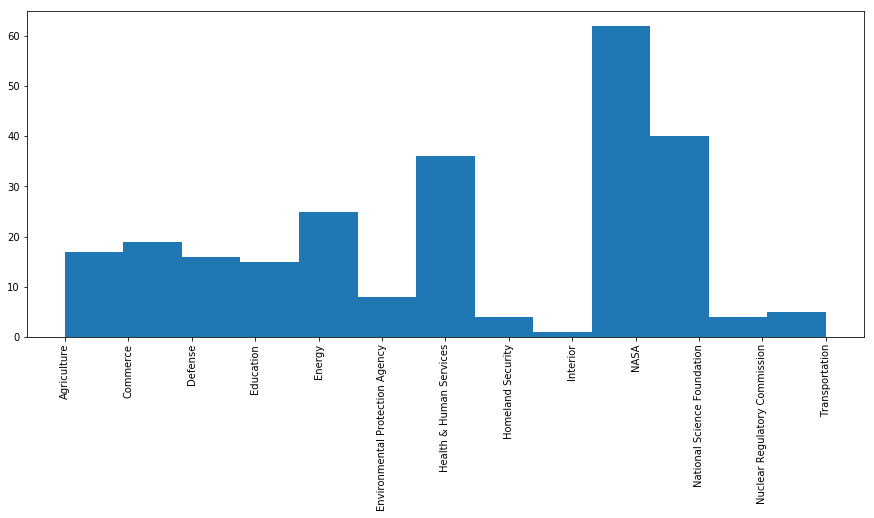

In [151]:
plt.figure(figsize = [15,6])
plt.hist(df['Agency'], bins = 13)
plt.xticks(rotation=90)
plt.show()

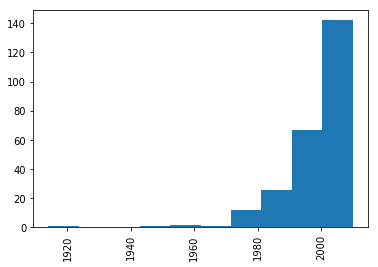

In [161]:
df['B) Year Established'].fillna(method = 'ffill', inplace = True)
plt.figure()
plt.hist(df['B) Year Established'])
plt.xticks(rotation=90)
plt.show()

In [175]:
for i in range(len(df.columns)):
    if ((len(df.iloc[:,i].unique())) > 50):
        print(df.iloc[:0,i].name,'=', len(df.iloc[:, i].unique()))

Subagency = 65
Unnamed: 141 = 139
Unnamed: 224 = 88
Unnamed: 237 = 54
W) Measurement Instruments Used = 74


In [177]:
df1 = df

In [178]:
#changing categorical variables into numeric value
for i in df1.columns: 
    if df1[i].dtype == 'object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(df1[i].values)) 
        df1[i] = lbl.transform(list(df1[i].values))
df1.fillna(0, inplace=True) 
df1 = df1.astype(float)
df1.shape

(252, 250)

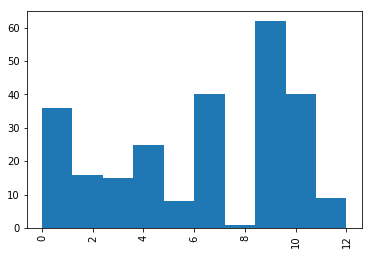

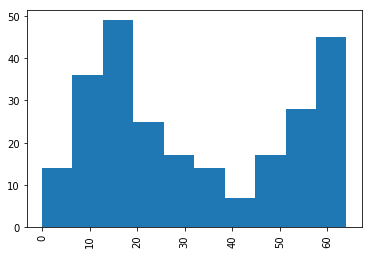

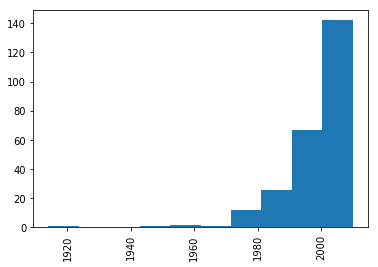

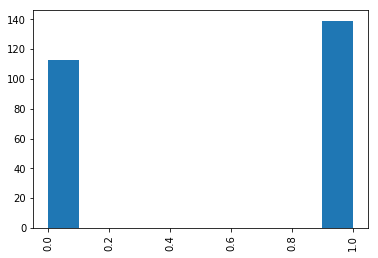

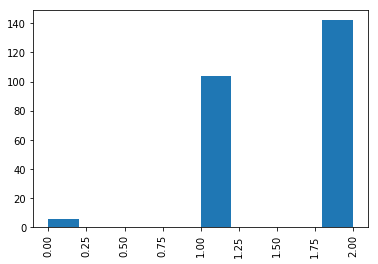

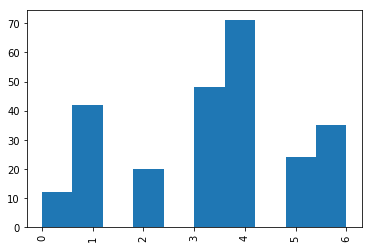

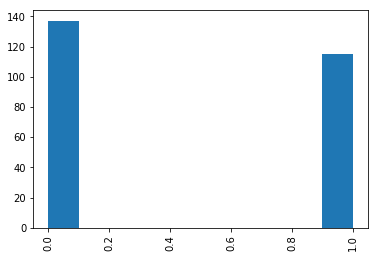

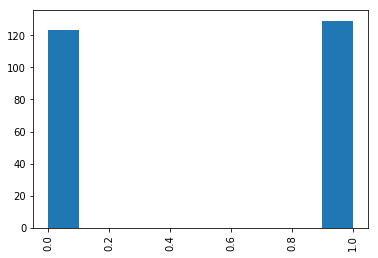

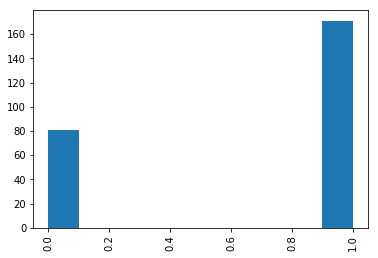

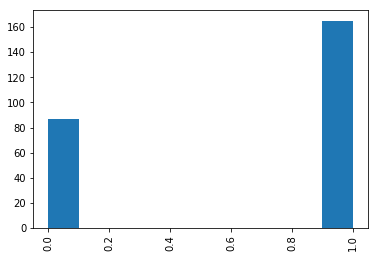

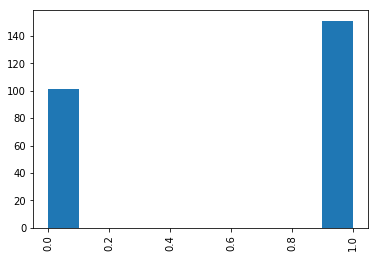

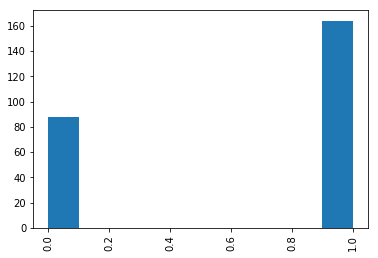

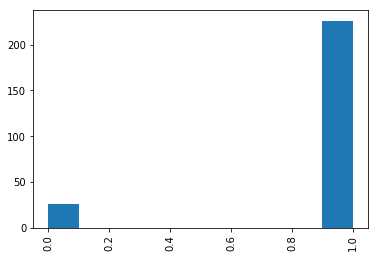

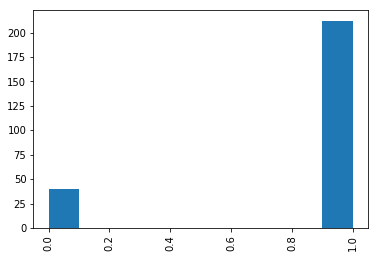

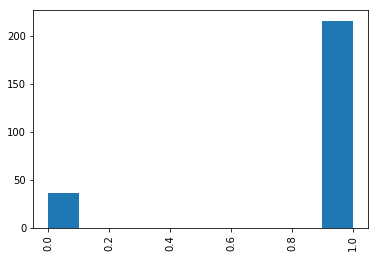

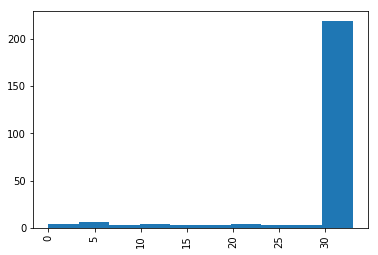

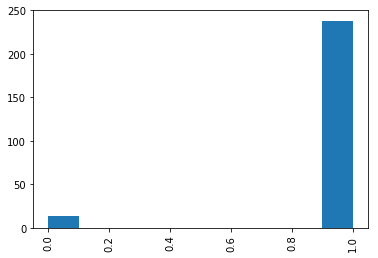

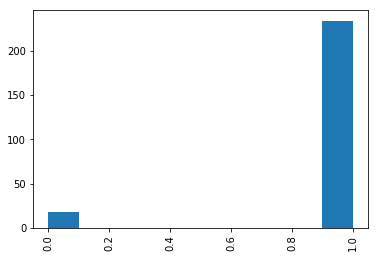

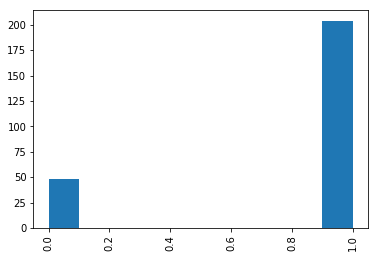

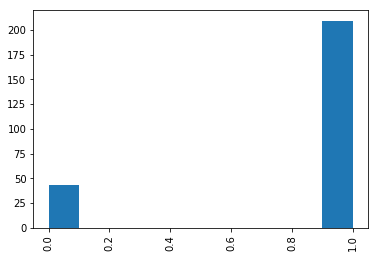

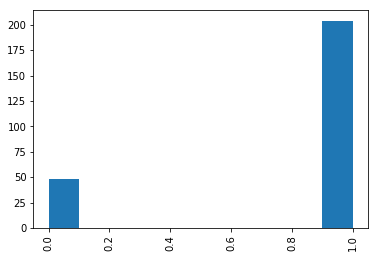

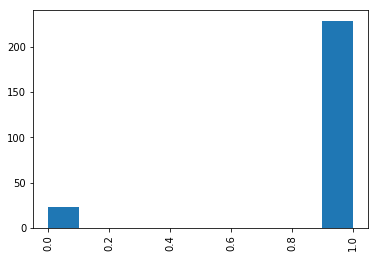

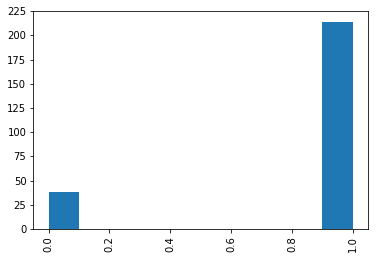

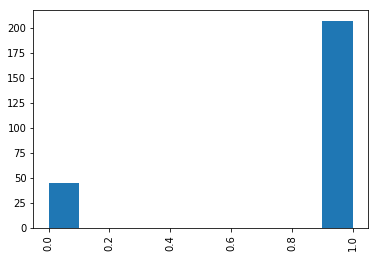

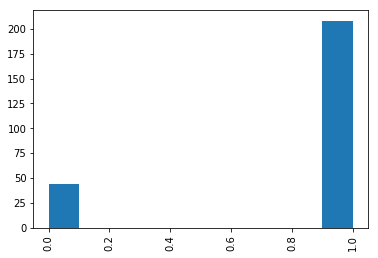

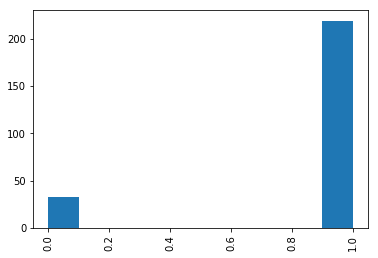

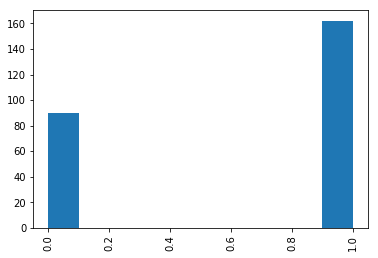

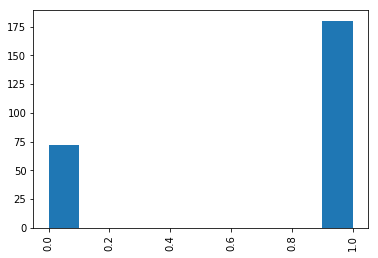

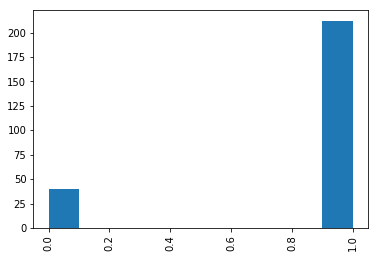

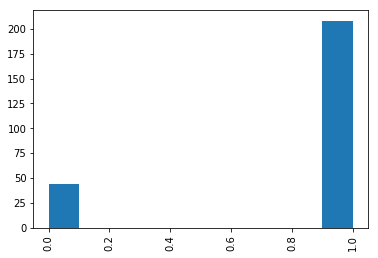

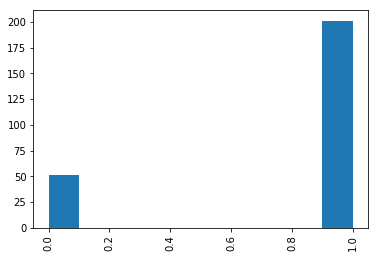

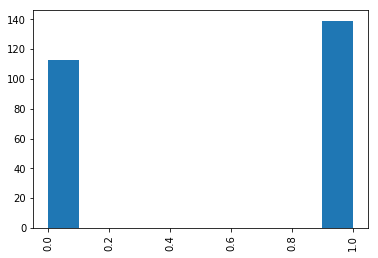

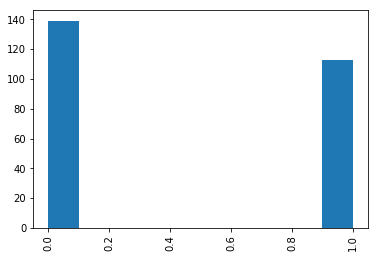

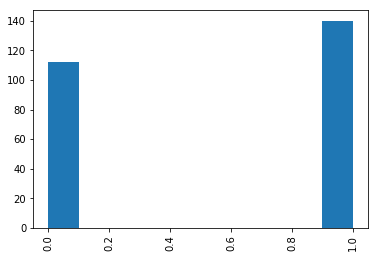

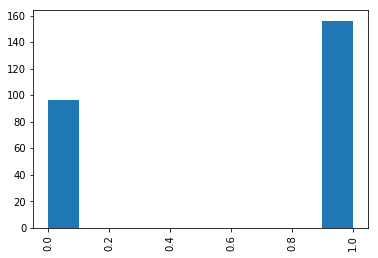

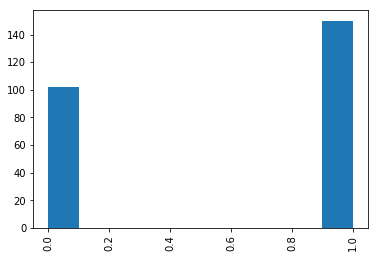

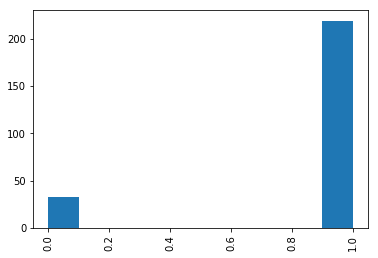

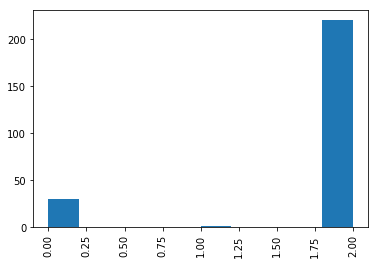

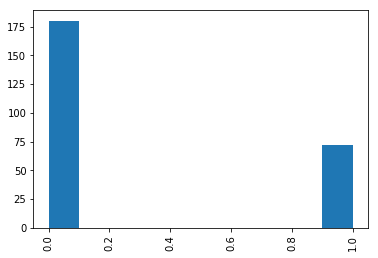

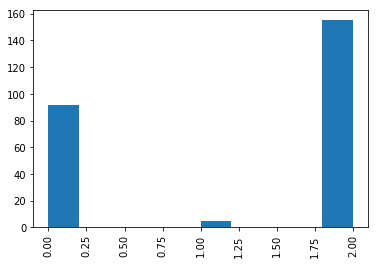

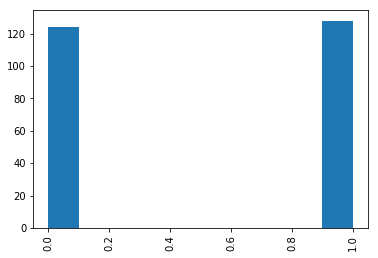

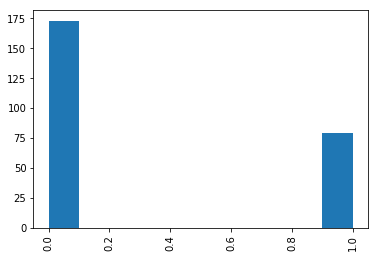

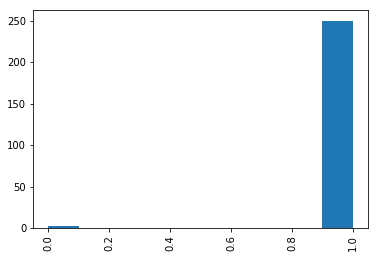

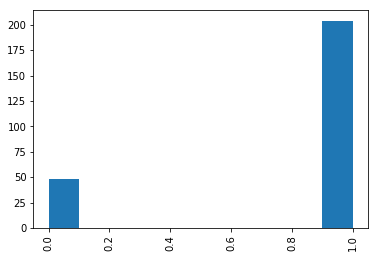

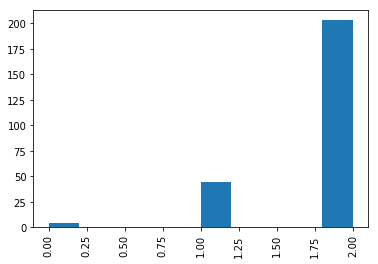

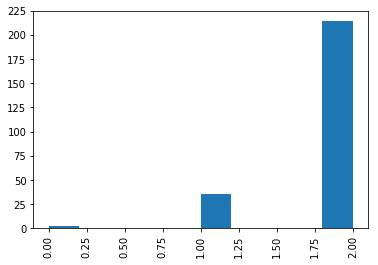

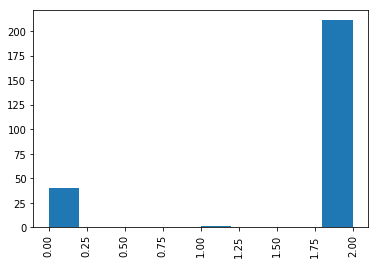

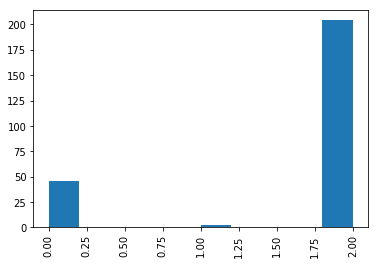

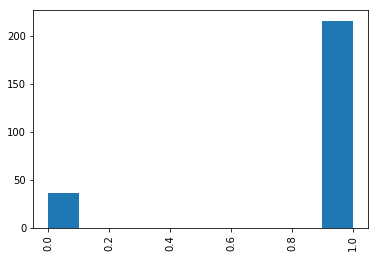

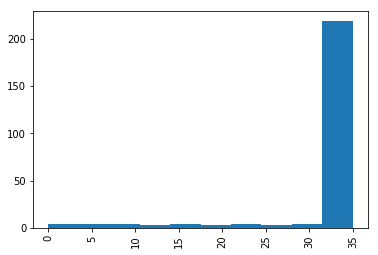

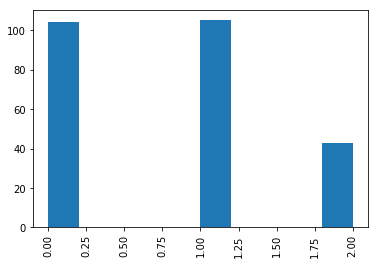

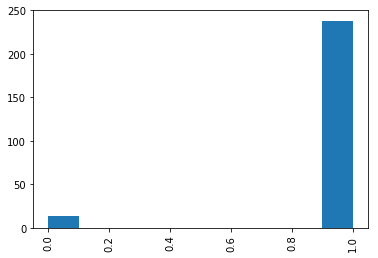

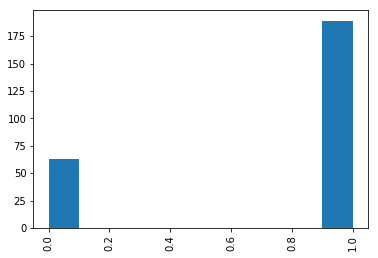

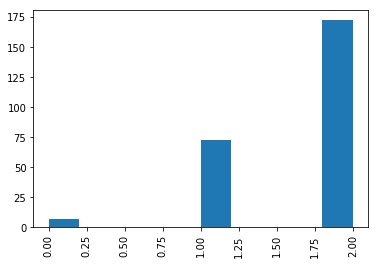

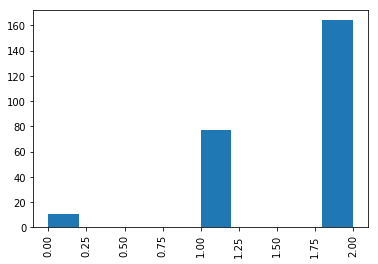

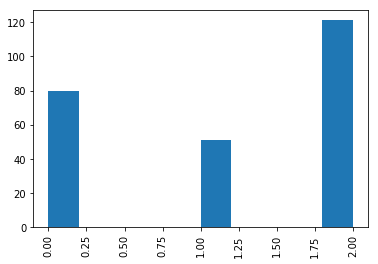

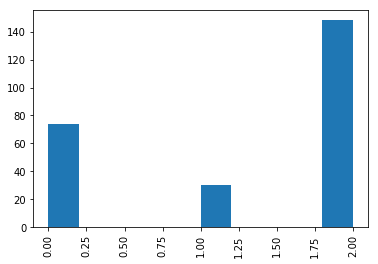

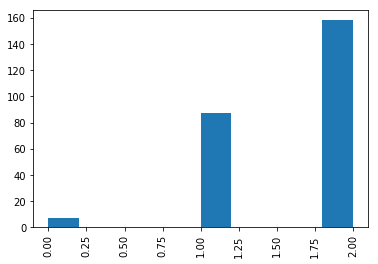

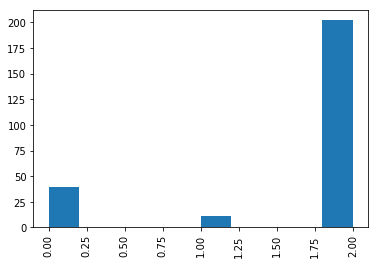

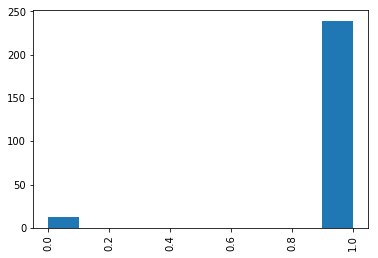

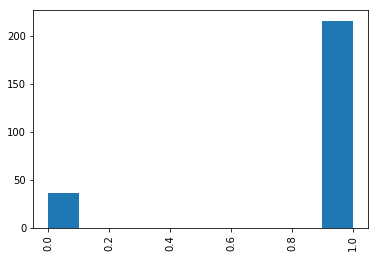

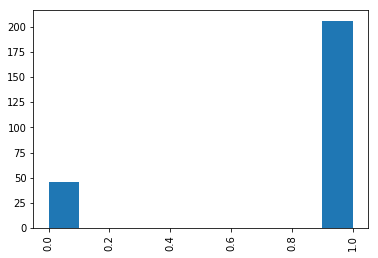

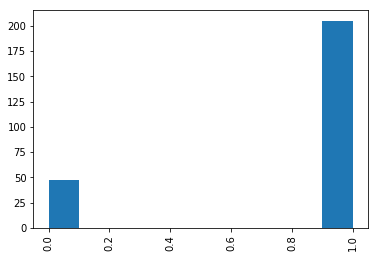

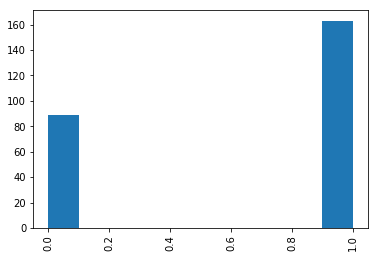

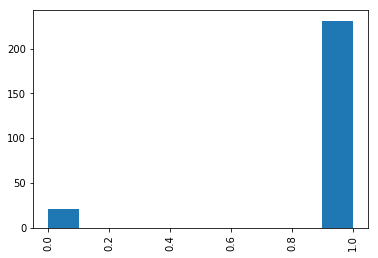

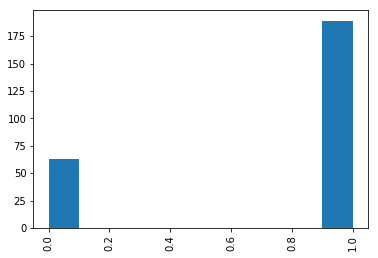

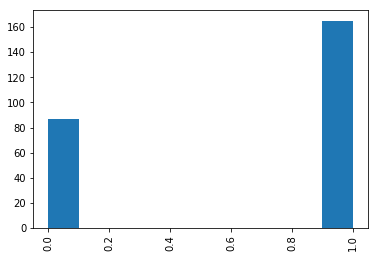

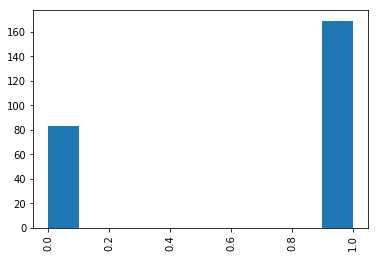

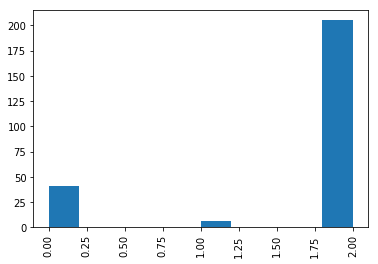

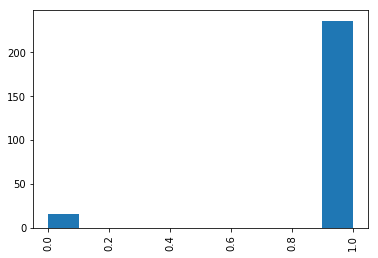

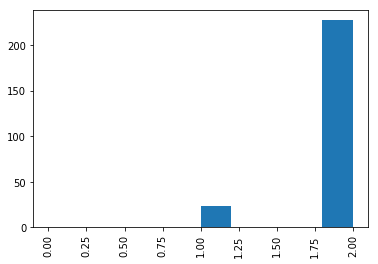

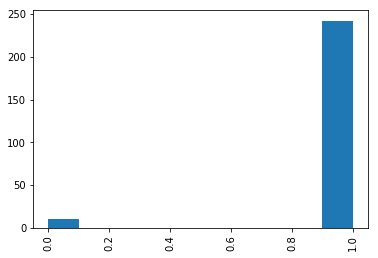

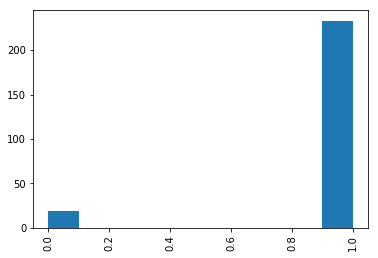

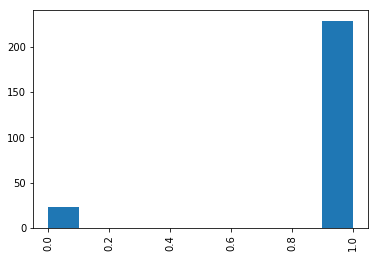

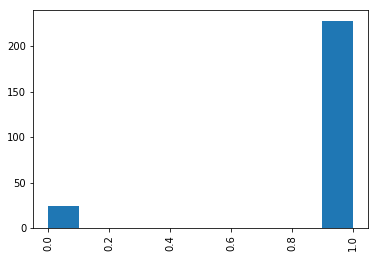

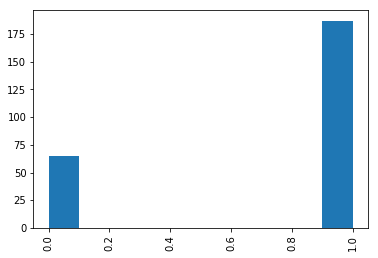

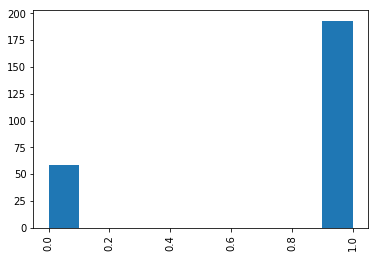

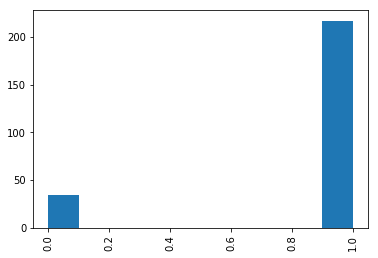

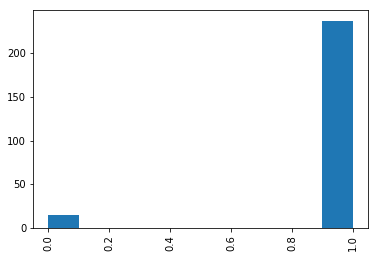

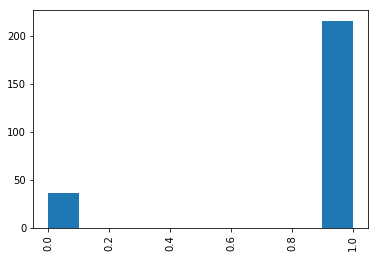

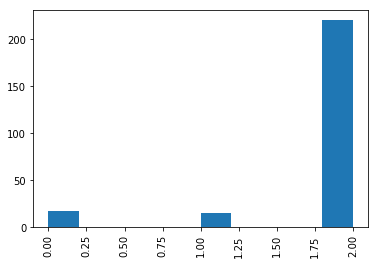

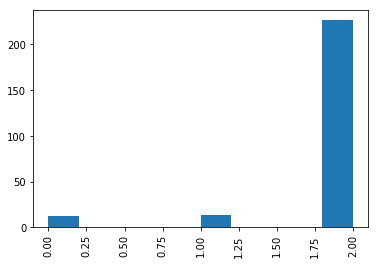

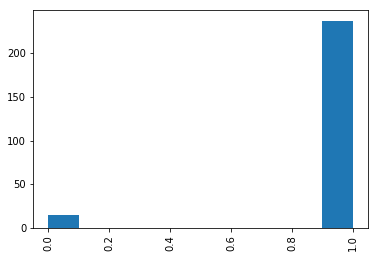

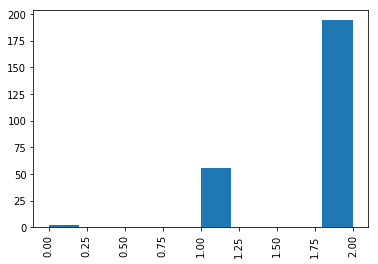

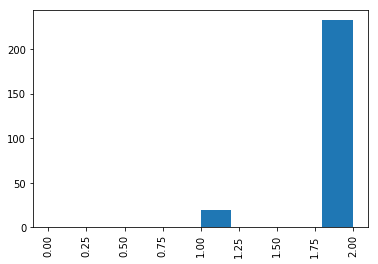

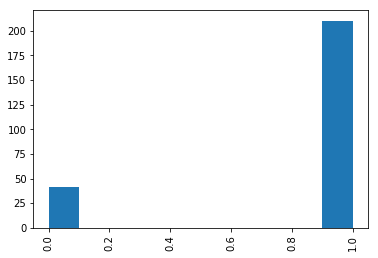

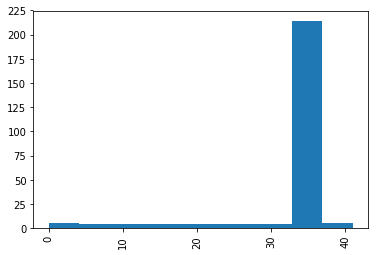

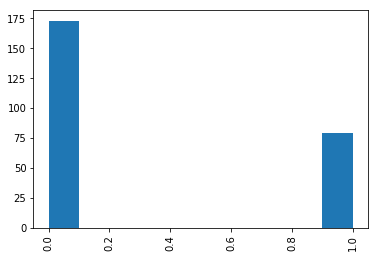

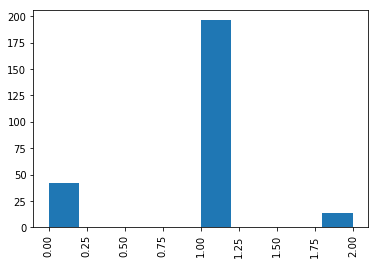

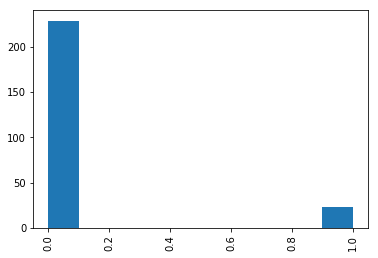

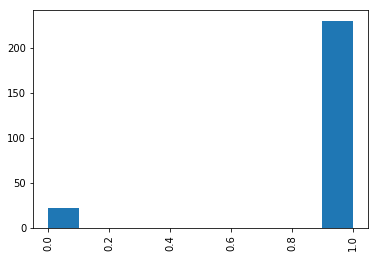

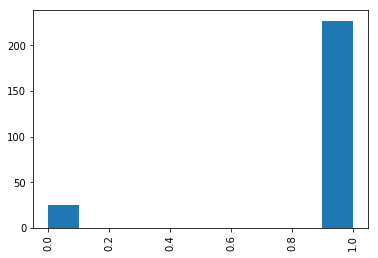

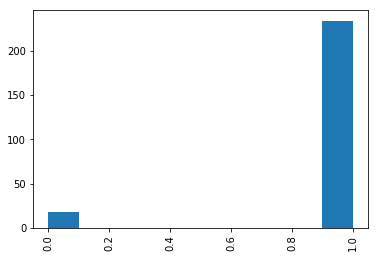

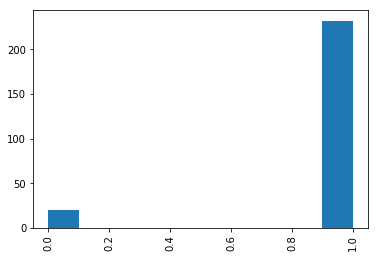

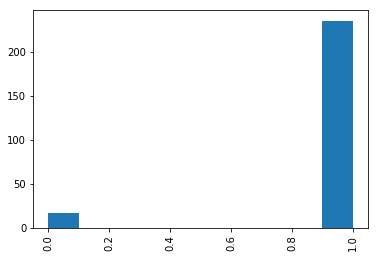

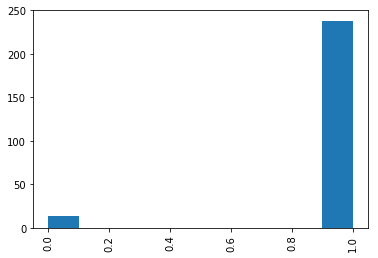

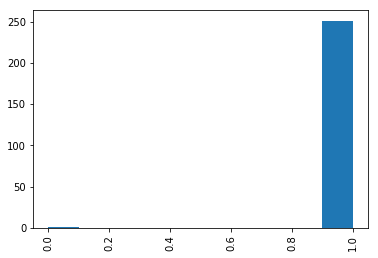

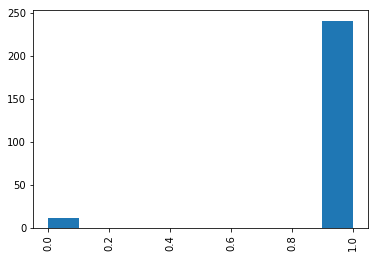

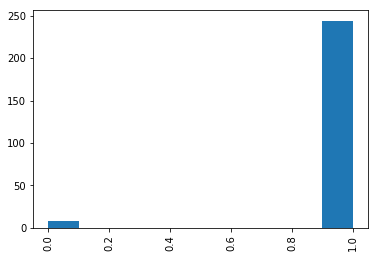

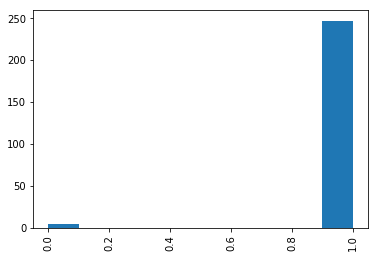

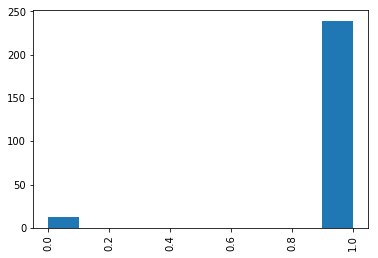

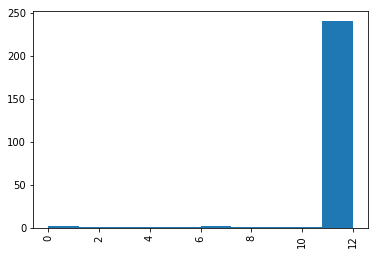

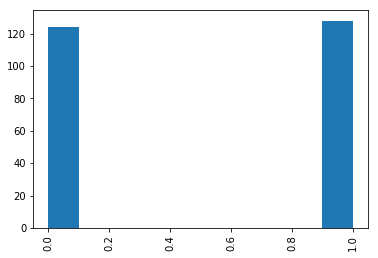

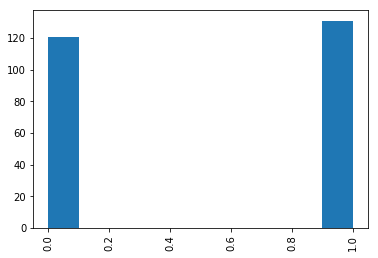

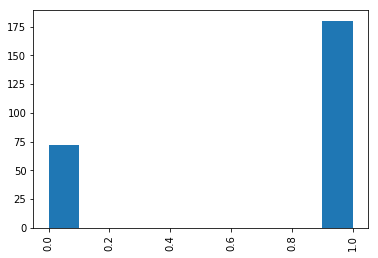

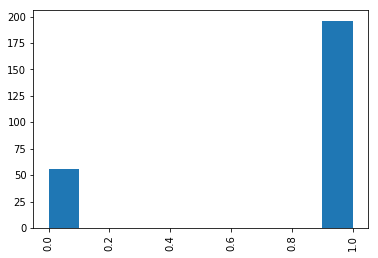

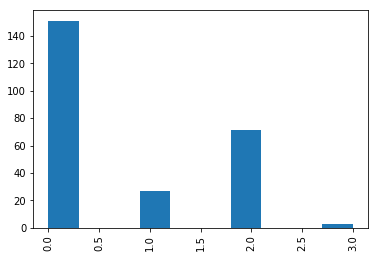

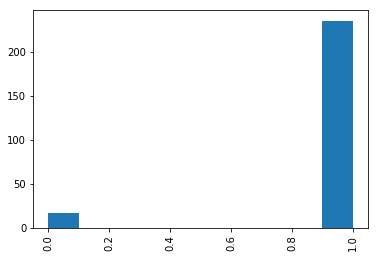

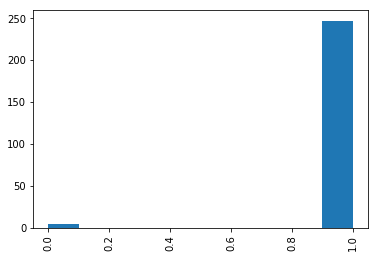

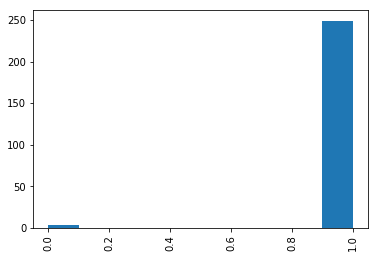

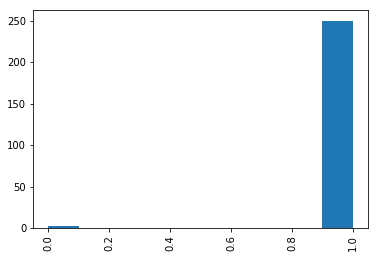

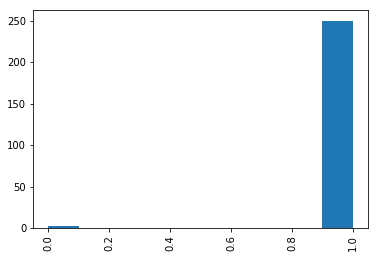

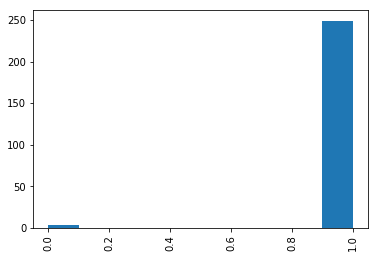

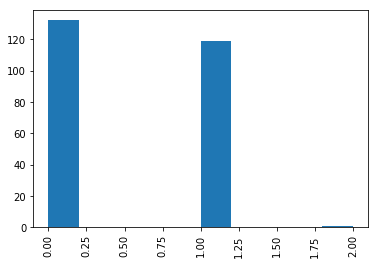

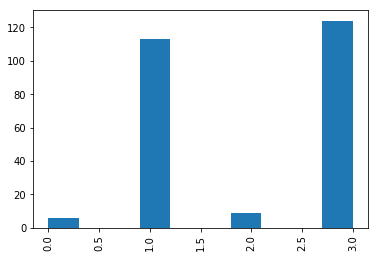

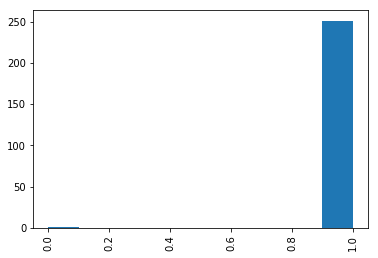

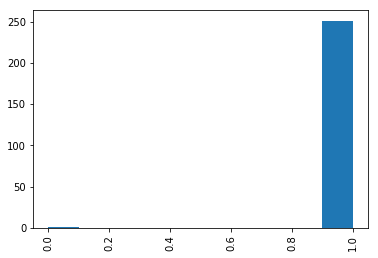

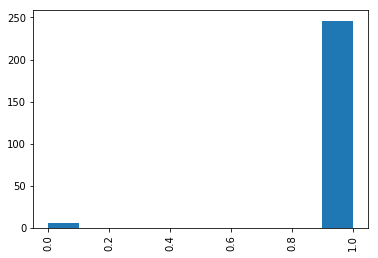

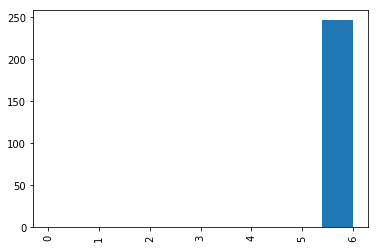

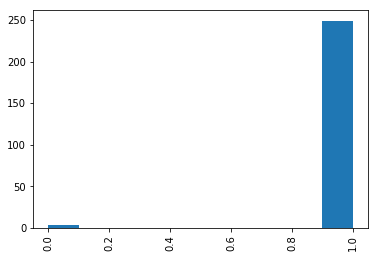

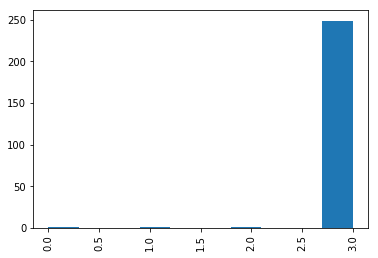

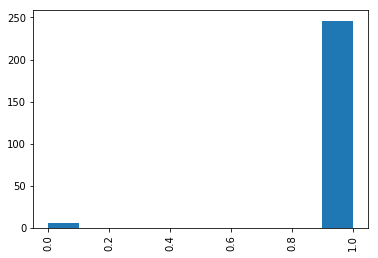

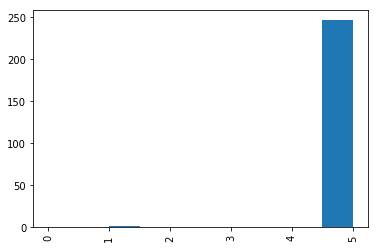

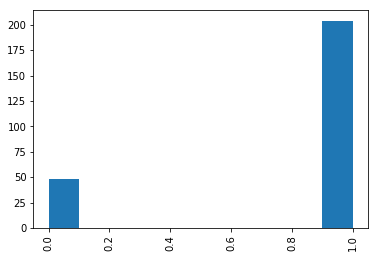

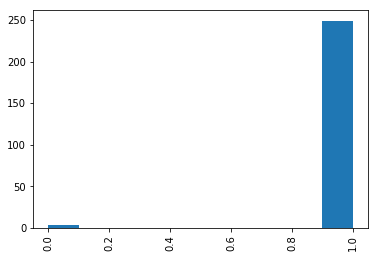

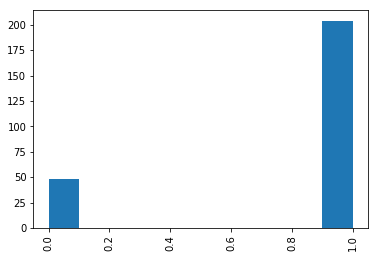

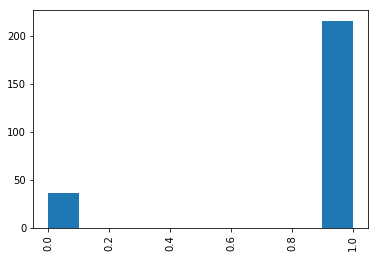

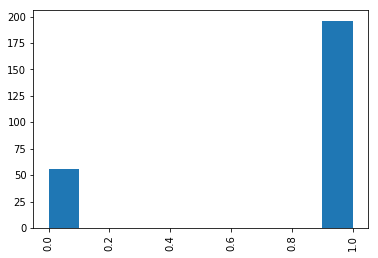

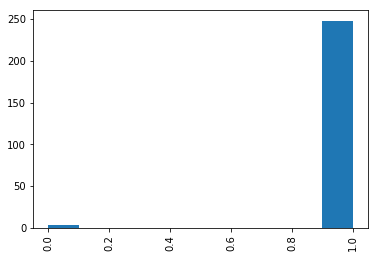

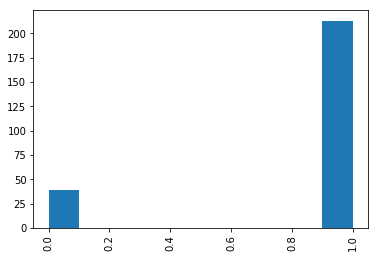

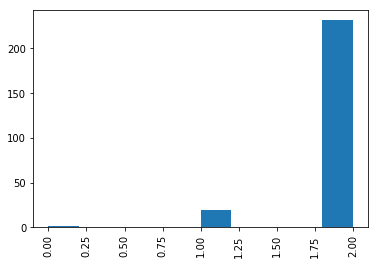

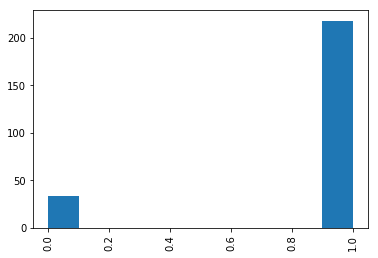

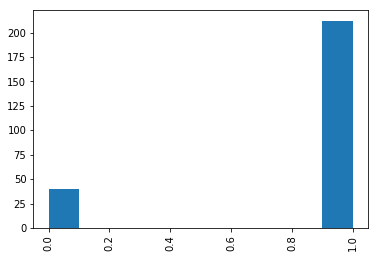

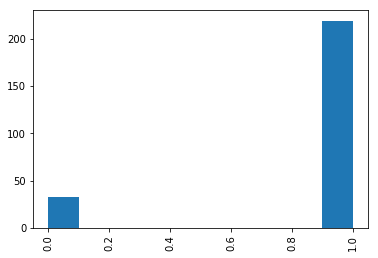

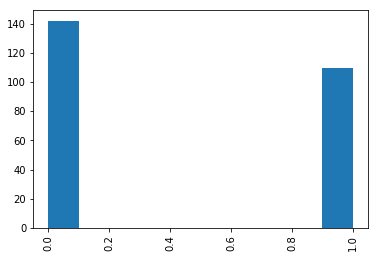

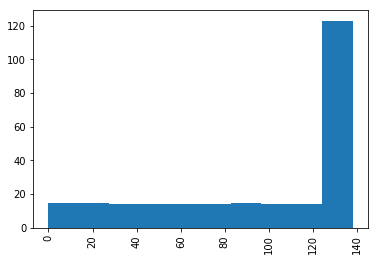

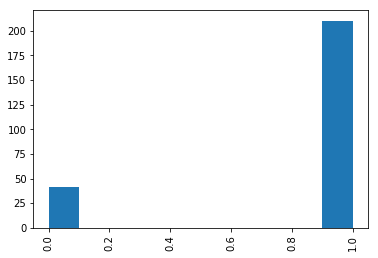

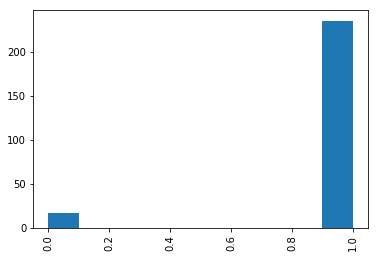

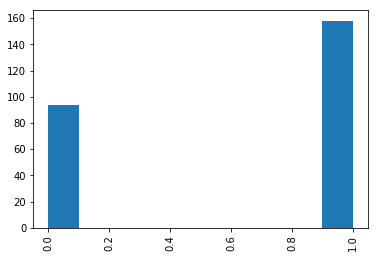

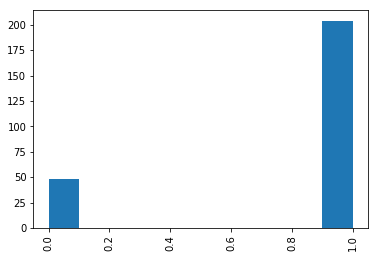

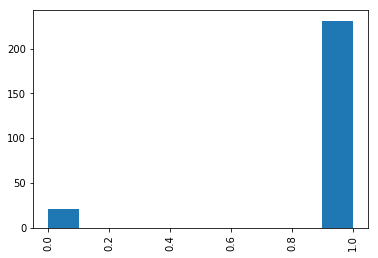

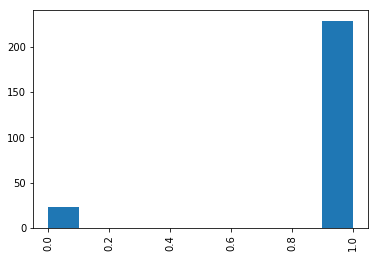

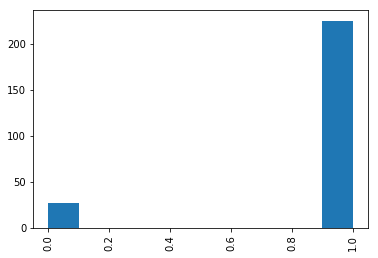

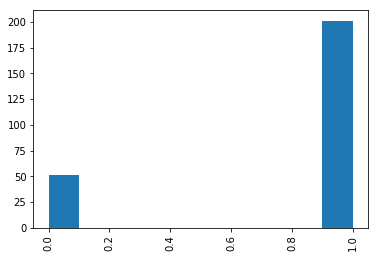

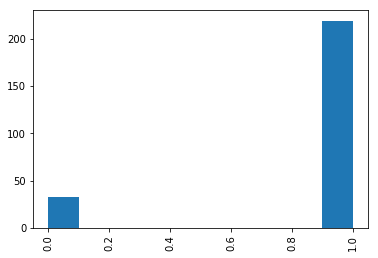

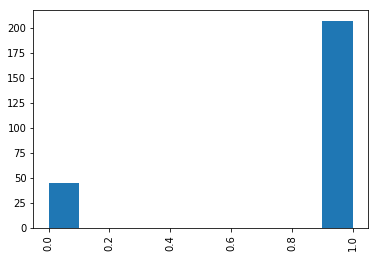

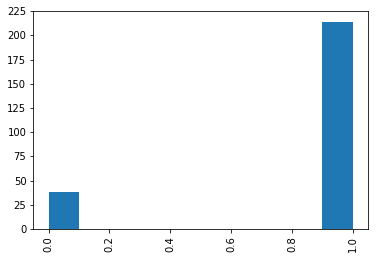

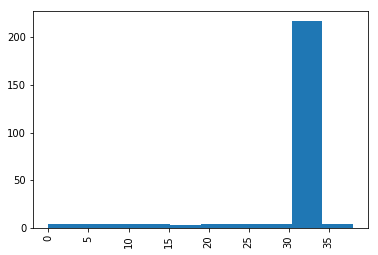

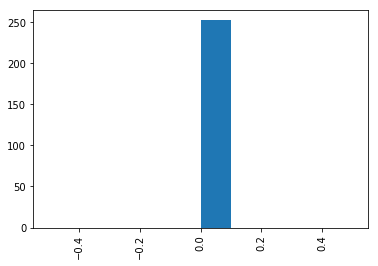

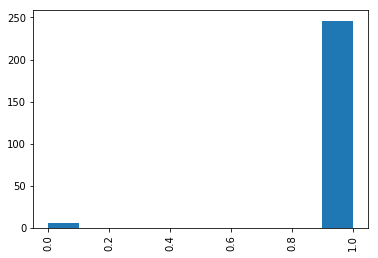

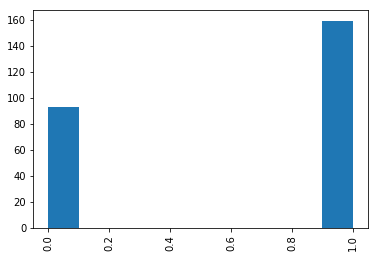

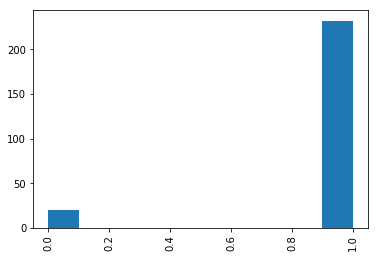

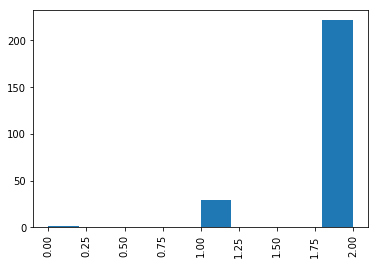

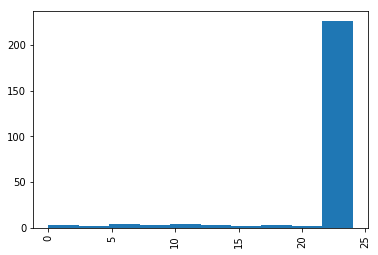

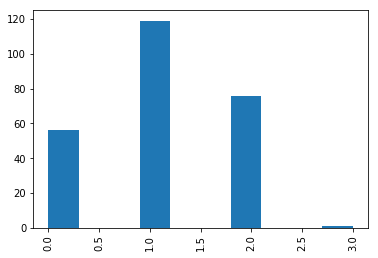

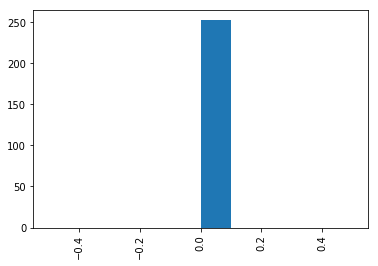

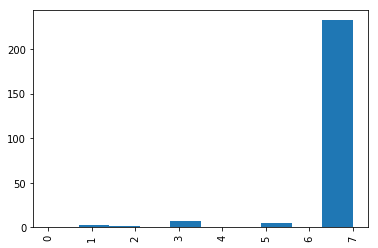

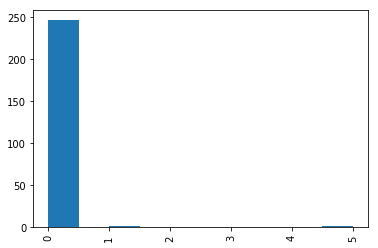

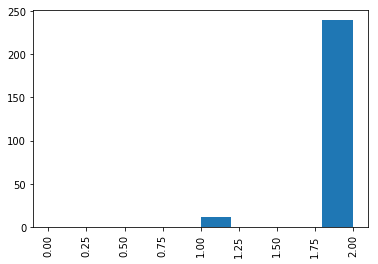

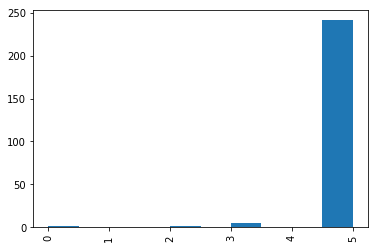

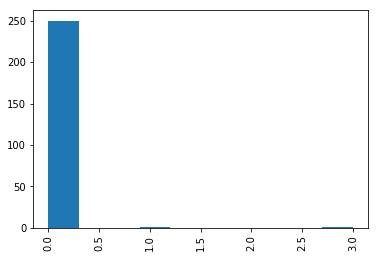

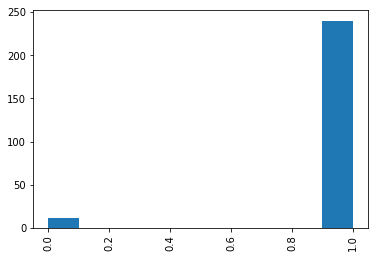

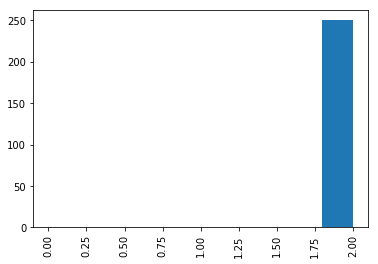

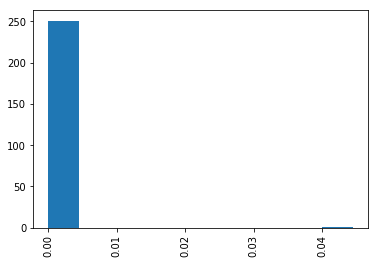

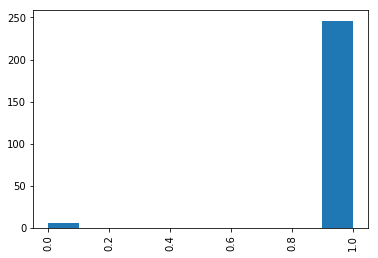

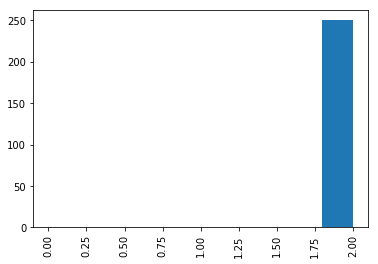

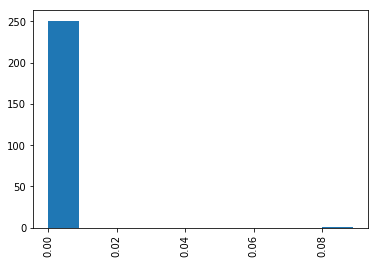

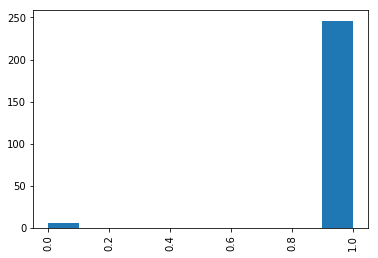

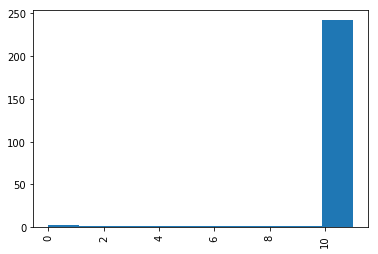

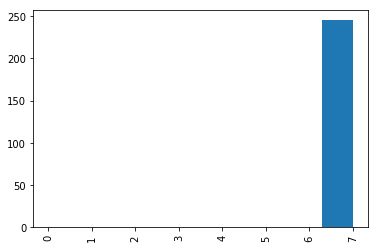

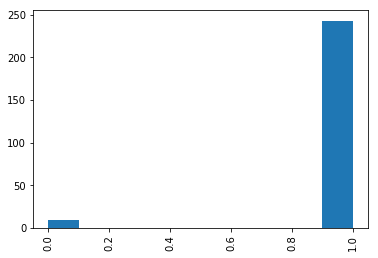

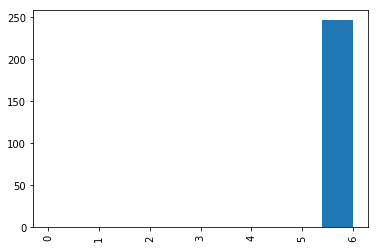

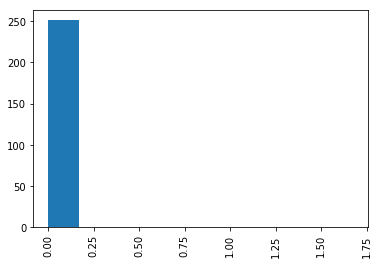

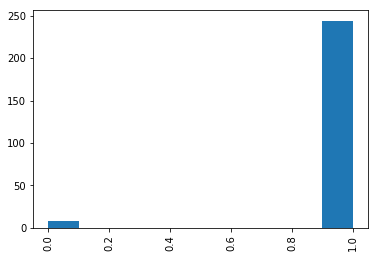

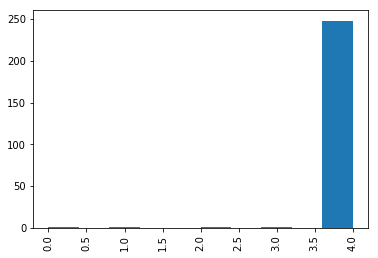

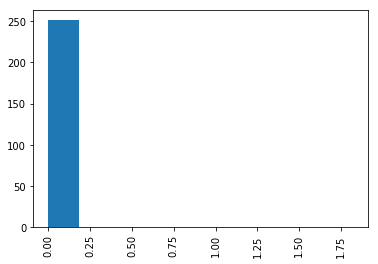

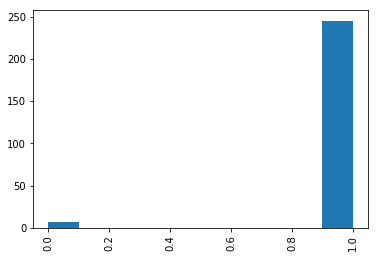

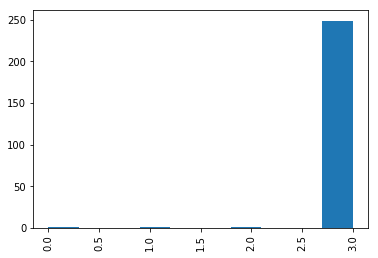

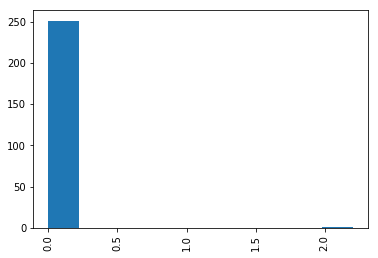

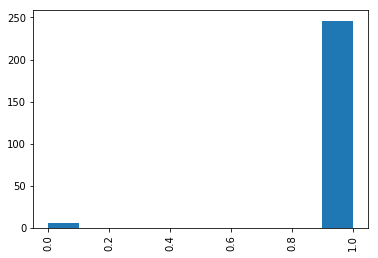

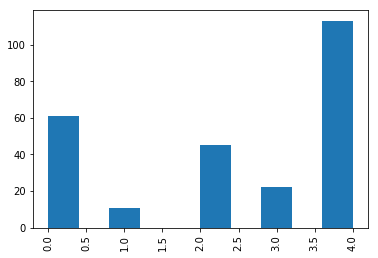

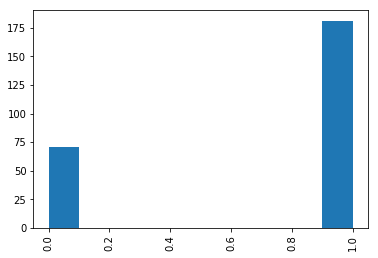

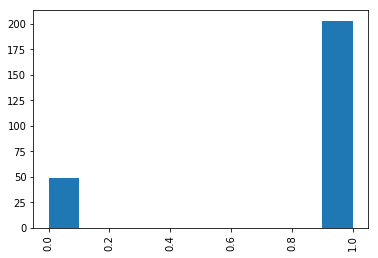

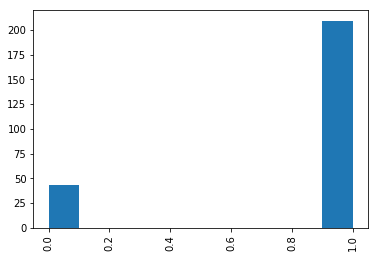

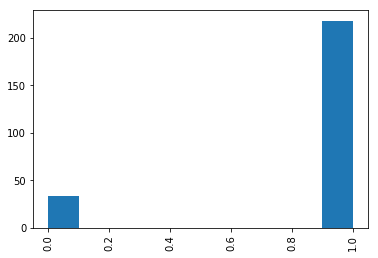

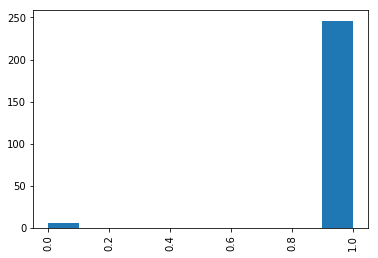

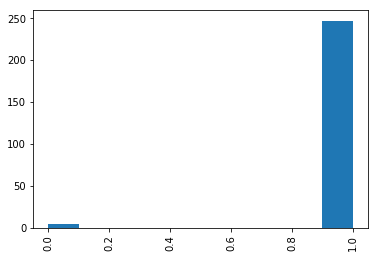

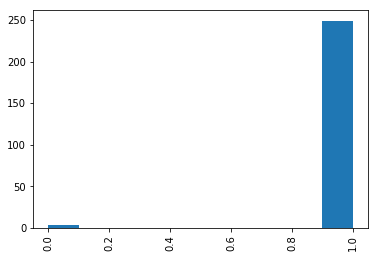

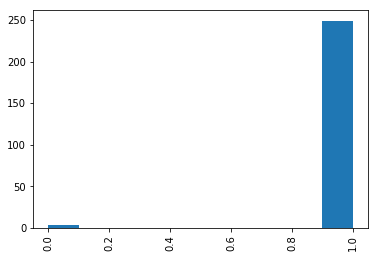

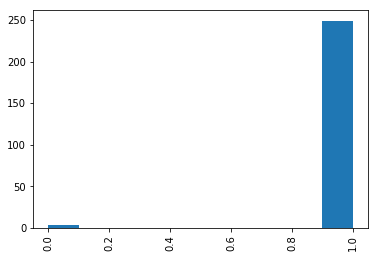

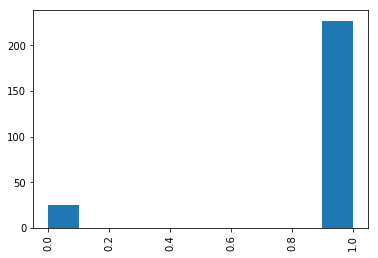

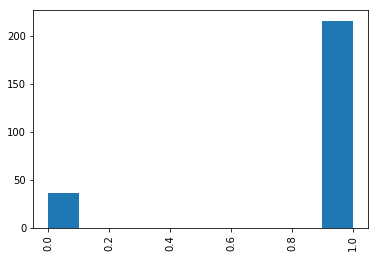

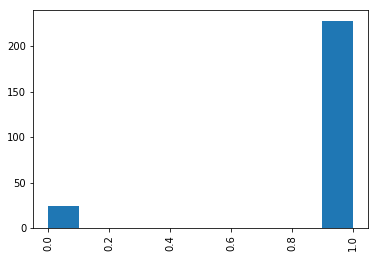

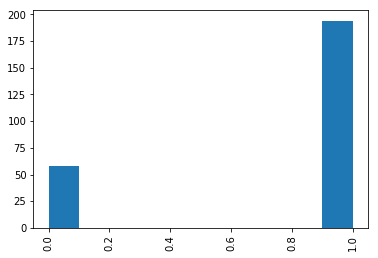

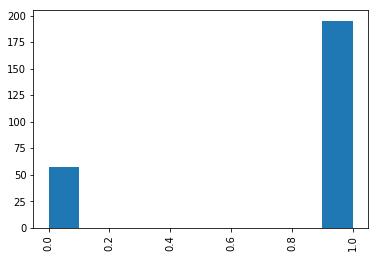

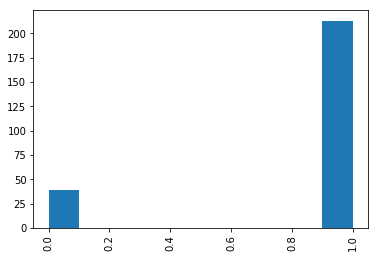

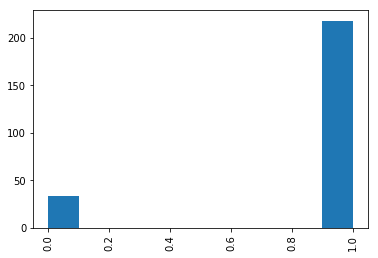

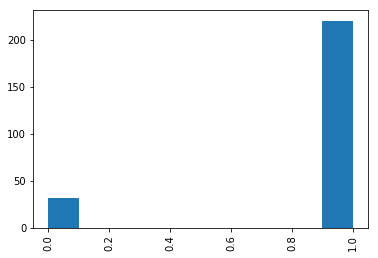

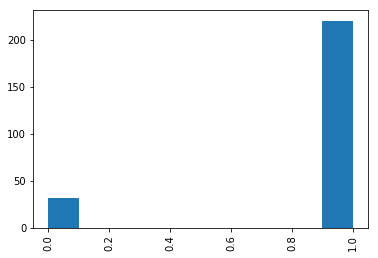

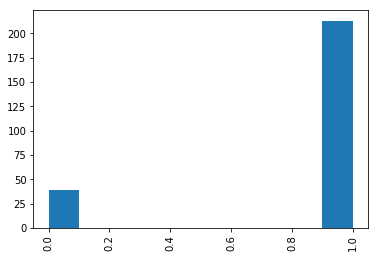

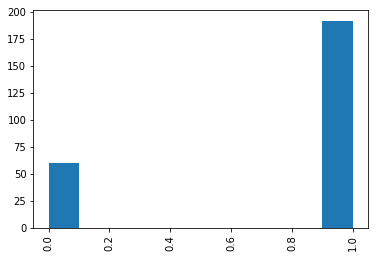

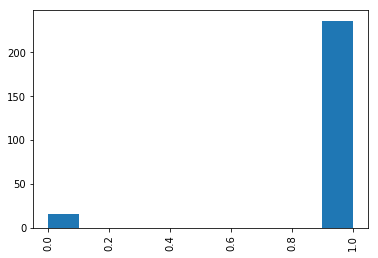

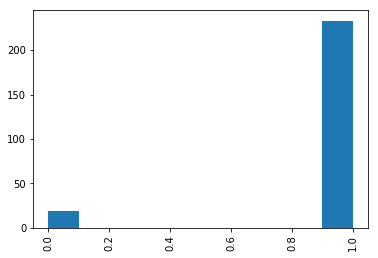

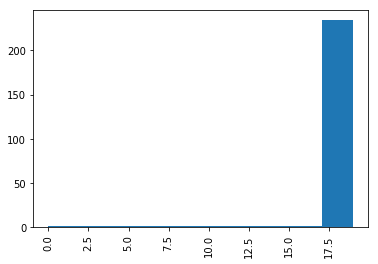

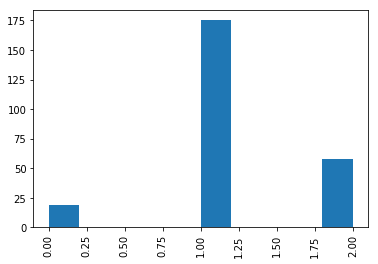

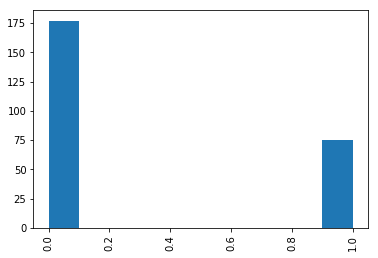

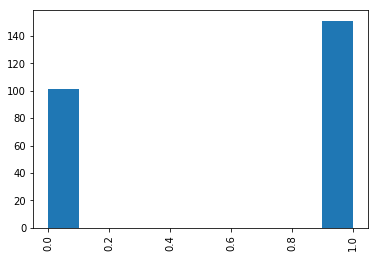

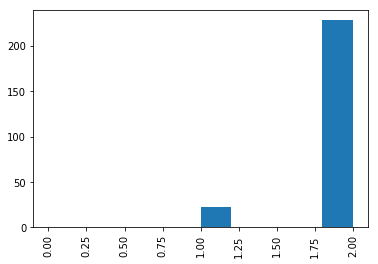

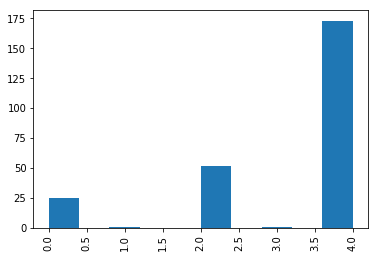

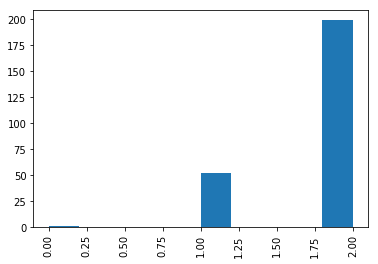

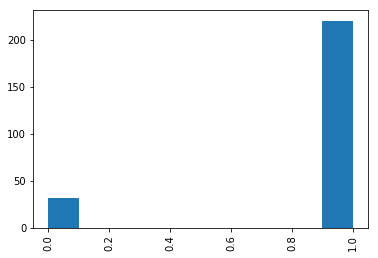

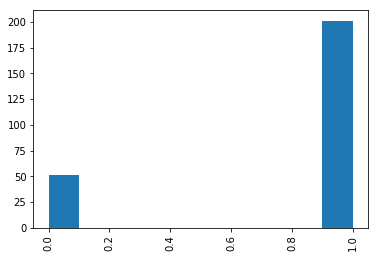

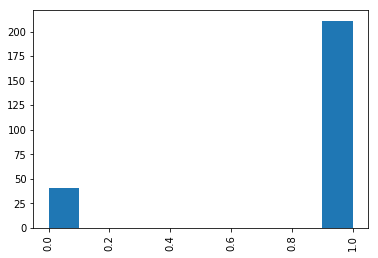

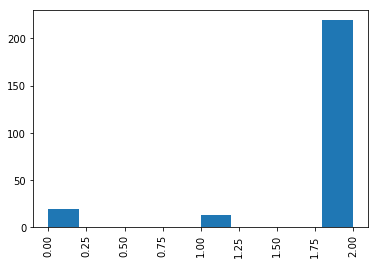

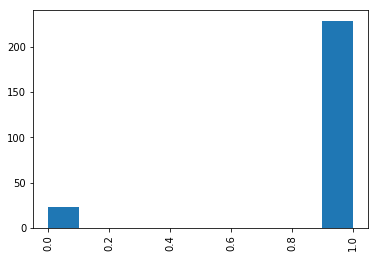

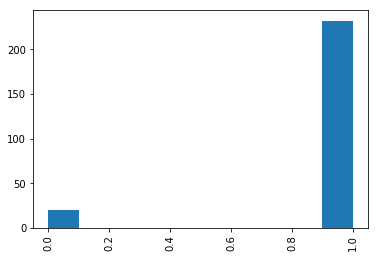

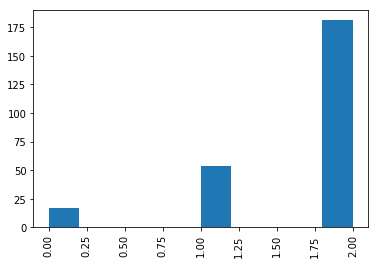

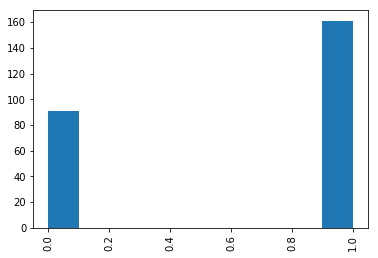

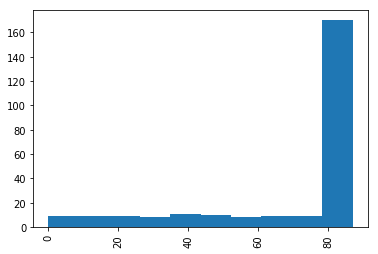

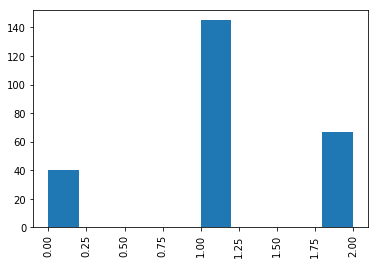

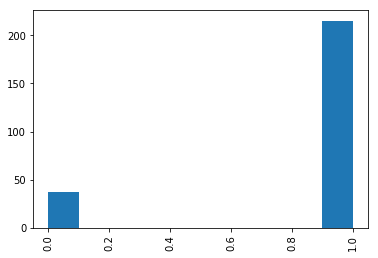

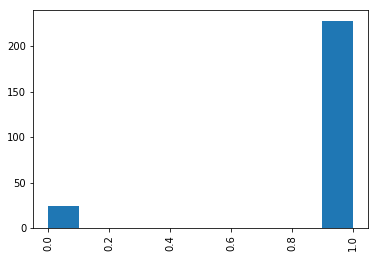

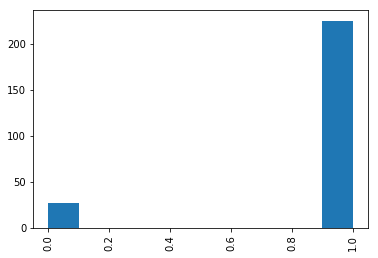

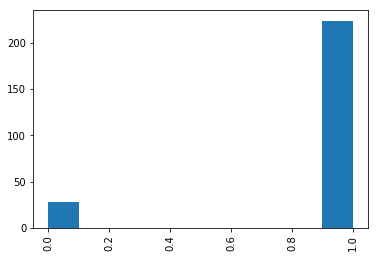

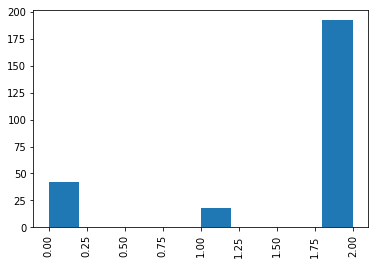

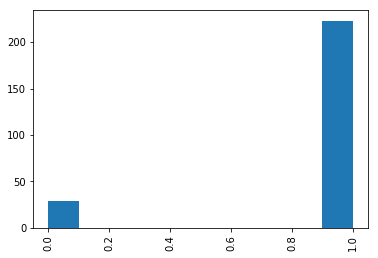

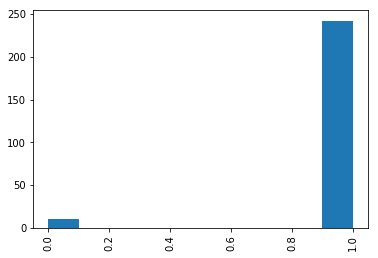

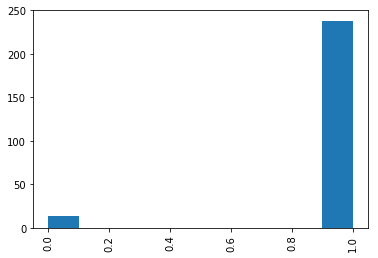

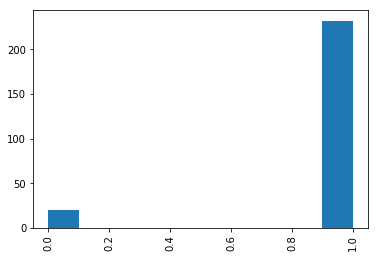

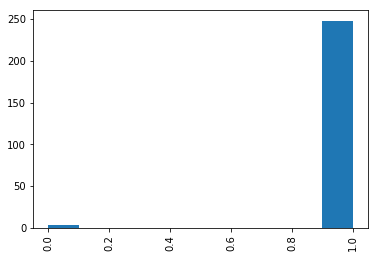

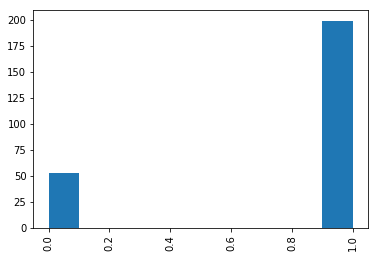

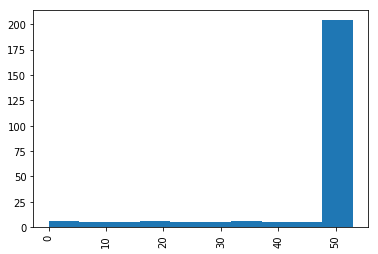

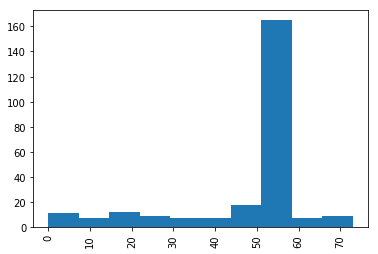

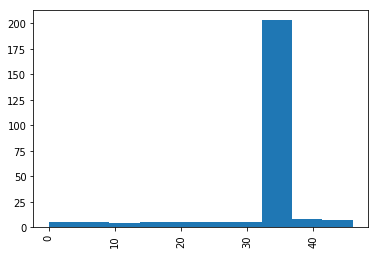

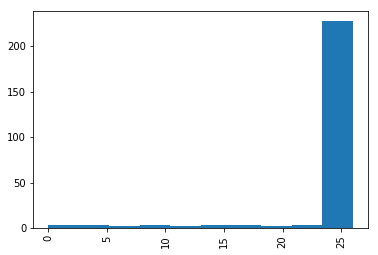

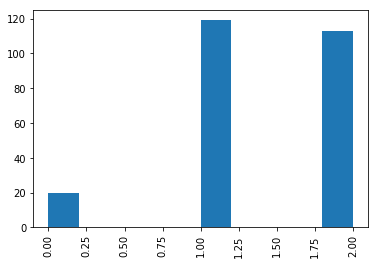

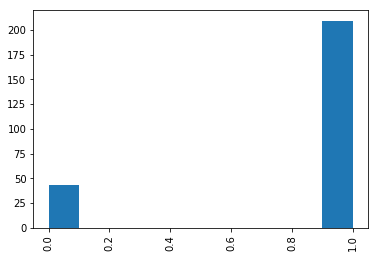

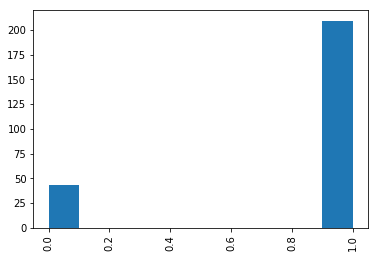

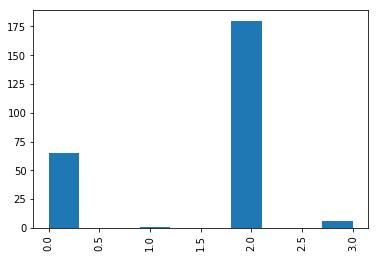

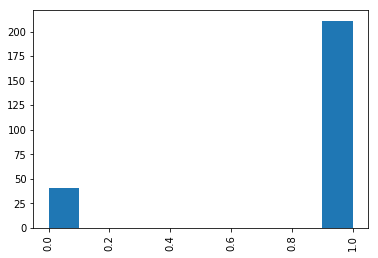

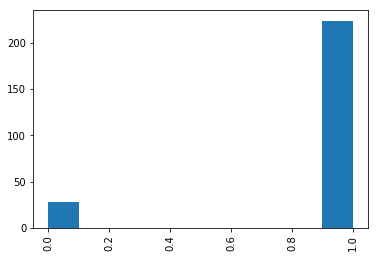

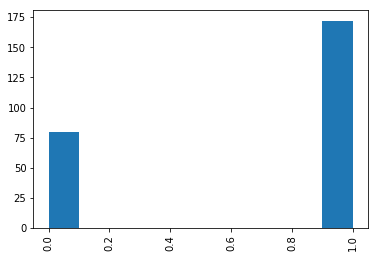

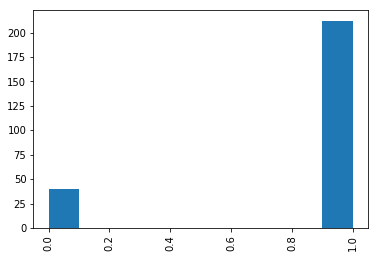

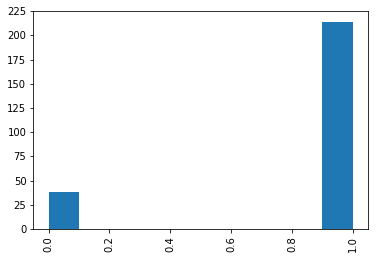

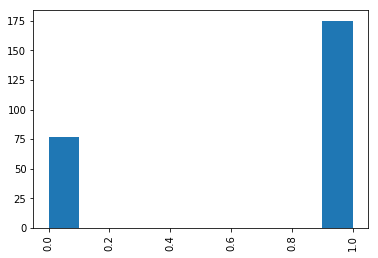

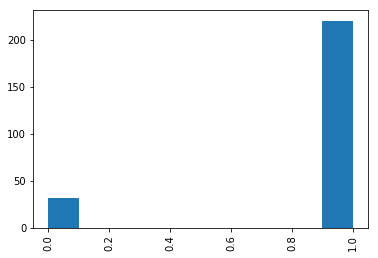

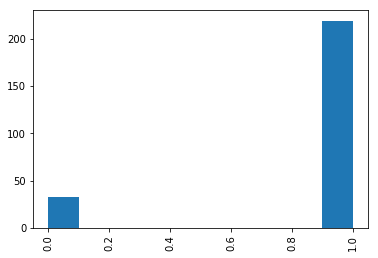

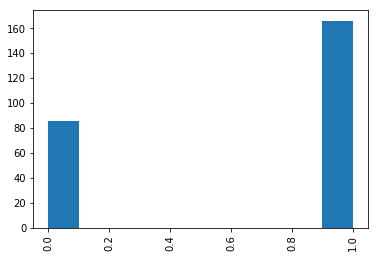

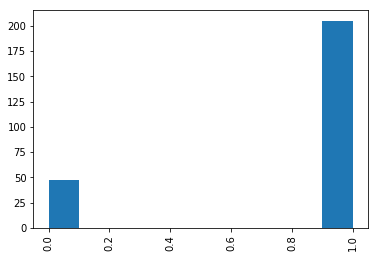

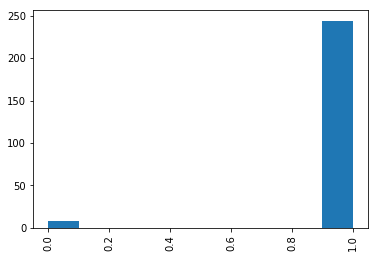

In [179]:
for i in range(len(df1.columns)):
    plt.figure()
    plt.hist(df1[df1.iloc[:0,i].name])
    plt.xticks(rotation=90)
    plt.show()

### mutual_info_score between target variable and all non-funding variables

In [180]:
X = df

In [181]:
for i in X.columns: 
    if X[i].dtype == 'object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(X[i].values)) 
        X[i] = lbl.transform(list(X[i].values))
X.fillna(0, inplace=True) 
X = np.array(X)
X = X.astype(float)
X.shape

(252, 250)

In [182]:
from sklearn.metrics import mutual_info_score
def mutual_info_rank_features(features, binary_labels):
# Convert Features to Boolean values
    bin_features = []
    for feature in features:
        nfv = []
        for elem in feature:
            if elem > 0:
                nfv.append(1)
            else:
                nfv.append(0)
        bin_features.append(nfv)

    mutual_infos = []
    num_features = len(bin_features[0])
    for i in range(num_features):
        row_i = [x[i] for x in bin_features]
        mi = mutual_info_score(row_i, binary_labels)
        mutual_infos.append(mi)

    ranked_indices = [index for (mi,index) in sorted(zip(mutual_infos,[x for x in range(num_features)]))]
    return ranked_indices
mutual_info_score = mutual_info_rank_features(X, y)
mutual_info_score

[2,
 148,
 155,
 220,
 6,
 204,
 244,
 182,
 13,
 229,
 41,
 87,
 243,
 141,
 79,
 126,
 67,
 91,
 190,
 102,
 16,
 51,
 9,
 32,
 75,
 19,
 35,
 61,
 66,
 161,
 58,
 195,
 201,
 223,
 240,
 129,
 213,
 215,
 26,
 47,
 77,
 107,
 221,
 124,
 187,
 188,
 189,
 74,
 192,
 211,
 191,
 63,
 59,
 151,
 80,
 94,
 137,
 196,
 64,
 4,
 185,
 208,
 76,
 186,
 125,
 127,
 144,
 73,
 214,
 239,
 24,
 23,
 145,
 27,
 193,
 25,
 72,
 202,
 103,
 90,
 17,
 37,
 227,
 5,
 157,
 206,
 60,
 247,
 194,
 199,
 197,
 50,
 142,
 222,
 114,
 117,
 164,
 167,
 179,
 62,
 224,
 143,
 99,
 108,
 78,
 82,
 65,
 106,
 98,
 249,
 134,
 48,
 198,
 3,
 18,
 241,
 123,
 139,
 95,
 228,
 235,
 217,
 29,
 15,
 49,
 70,
 84,
 86,
 96,
 115,
 116,
 118,
 120,
 122,
 135,
 147,
 153,
 156,
 158,
 165,
 169,
 171,
 174,
 177,
 207,
 209,
 233,
 234,
 69,
 38,
 68,
 57,
 176,
 225,
 248,
 150,
 34,
 81,
 133,
 140,
 183,
 7,
 71,
 53,
 200,
 56,
 216,
 10,
 113,
 160,
 236,
 173,
 92,
 105,
 43,
 104,
 212,
 238,
 46,
 219,

In [183]:
pd.Series(mutual_info_score, index = df.columns)

Agency                                             2
Subagency                                        148
B) Year Established                              155
D) Mission-specific or General STEM?             220
E) Agency or Mission-Related Workforce Needs?      6
F1) Primary Investment Objective                 204
F2) Secondary Investment Objectives              244
Unnamed: 13                                      182
Unnamed: 14                                       13
Unnamed: 15                                      229
Unnamed: 16                                       41
Unnamed: 17                                       87
Unnamed: 18                                      243
Unnamed: 19                                      141
Unnamed: 20                                       79
Unnamed: 21                                      126
G1) Primary Research Approaches                   67
Unnamed: 23                                       91
Unnamed: 24                                   